In [19]:
from Crypto.Util.number import long_to_bytes, bytes_to_long, inverse, getPrime, GCD
import random

# Prerequisites

- RSADSA
- Modular arithmetic

# Theory

- https://en.wikipedia.org/wiki/Blind_signature

**Task**
- Let (e,N) be the public key, and $d$ be the decription exponent
- Having a ciphertext $c \equiv m^e \bmod N$ you can forge the encryption of $mr$
- Forge a signature of $m$ without signing it

**Propriety**: RSA is homomorphic under multiplication
- $(xy)^e \equiv x^ey^e \bmod N$

Let $m$ be a message. 
- Eve can create another message $m' \equiv r^em \bmod N$
- She submits the message $m'$ to signing => $m'^d \equiv (mr^e)^d \equiv m^dr^{ed} \equiv m^dr \bmod N => $  she gets back $m^dr$
- She then computes $m^dr \cdot r^{-1} \equiv m^d \bmod N$ which is a signature for $m$
- She can then send the message-signature pair to Alice who will compute $s^e \equiv m^{de} \equiv m \bmod N$ therefore verifying the signature

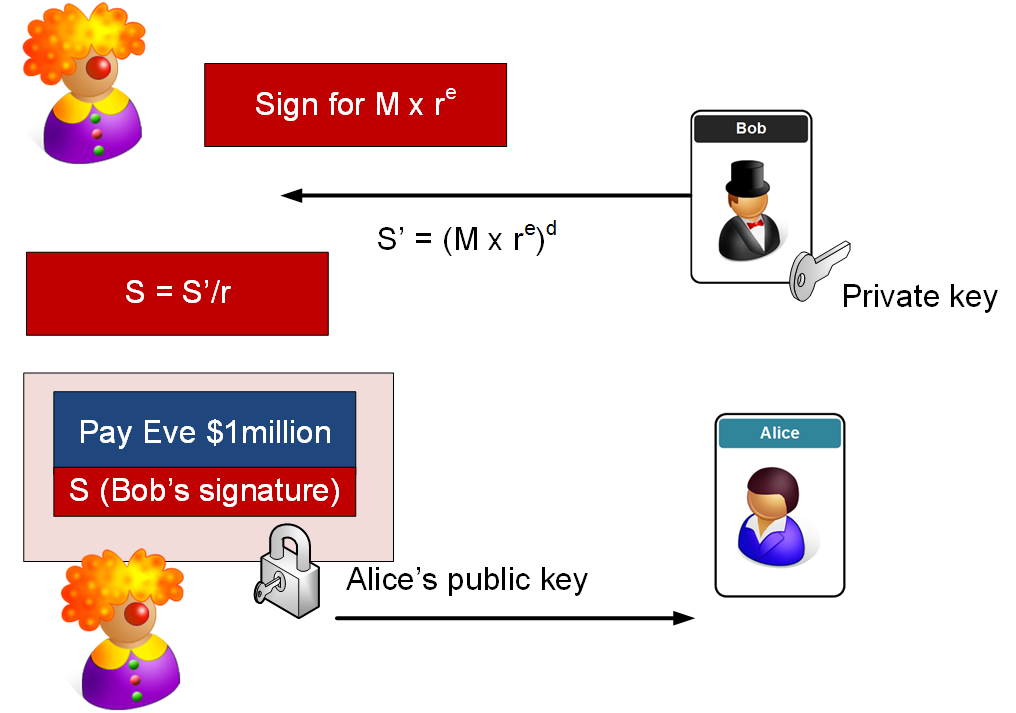

# Code

In [7]:
def generate_keys():
    p = getPrime(1024)
    q = getPrime(1024)
    N = p*q
    e = 65537
    assert(GCD(e, N) == 1)
    phi = (p-1)*(q-1)
    d = inverse(e, phi)
    return (e, N), (p, q, d)

In [35]:
(e, N), (p, q, d) = generate_keys()

In [36]:
def sign(m, d, N):
    if long_to_bytes(m) == b'unsignable_secret_key':
        return "Can't sign that"
    s = pow(m, d, N)
    return s
    

In [44]:
def verify_sign(m, e, N, s):
    return pow(s, e, N) == m

In [38]:
m = bytes_to_long(b'unsignable_secret_key')

In [39]:
sign(m, d, N)

"Can't sign that"

In [40]:
r = random.randint(1, N) 
m_ = (m * pow(r, e, N)) % N
s_ = sign(m_, d, N)
s = (s_ * inverse(r, N)) % N

In [45]:
verify_sign(m, e, N, s)

True

# Resources

- https://asecuritysite.com/encryption/c_c2
- https://en.wikipedia.org/wiki/Blinding_(cryptography)
- https://www.youtube.com/watch?v=3oGbfVn27j8